In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
%matplotlib inline

In [2]:
df = pd.read_csv('house_data.csv') 
df.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [3]:
def convert_label_actual(value):
    result = round(abs(value) * 10000)
    return result

# Now you can print the result
print(convert_label_actual(-0.339584))


3396


In [4]:
df.tail()

,date,age,distance,stores,latitude,longitude,price
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313
4999,2018,9,1,9,90,127,12770


In [5]:
df.shape

(5000, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   date       5000 non-null   int64
 1   age        5000 non-null   int64
 2   distance   5000 non-null   int64
 3   stores     5000 non-null   int64
 4   latitude   5000 non-null   int64
 5   longitude  5000 non-null   int64
 6   price      5000 non-null   int64
dtypes: int64(7)
memory usage: 273.6 KB


In [7]:
df.describe()

,date,age,distance,stores,latitude,longitude,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2008.912800,18.945000,4.977800,4.915000,84.97140,124.994200,13906.638600
std,5.457578,11.329539,3.199837,3.142889,3.16199,3.167992,1020.774876
min,2000.000000,0.000000,0.000000,0.000000,80.00000,120.000000,11263.000000
25%,2004.000000,9.000000,2.000000,2.000000,82.00000,122.000000,13197.750000
50%,2009.000000,19.000000,5.000000,5.000000,85.00000,125.000000,13893.500000
75%,2014.000000,29.000000,8.000000,8.000000,88.00000,128.000000,14614.000000
max,2018.000000,38.000000,10.000000,10.000000,90.00000,130.000000,16964.000000


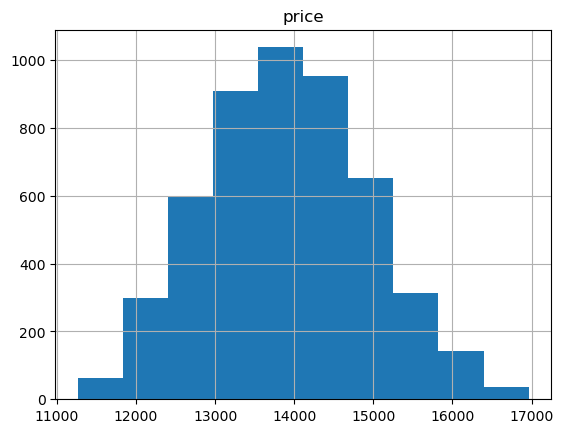

In [8]:
df.hist("price")
plt.show()

<Axes: >

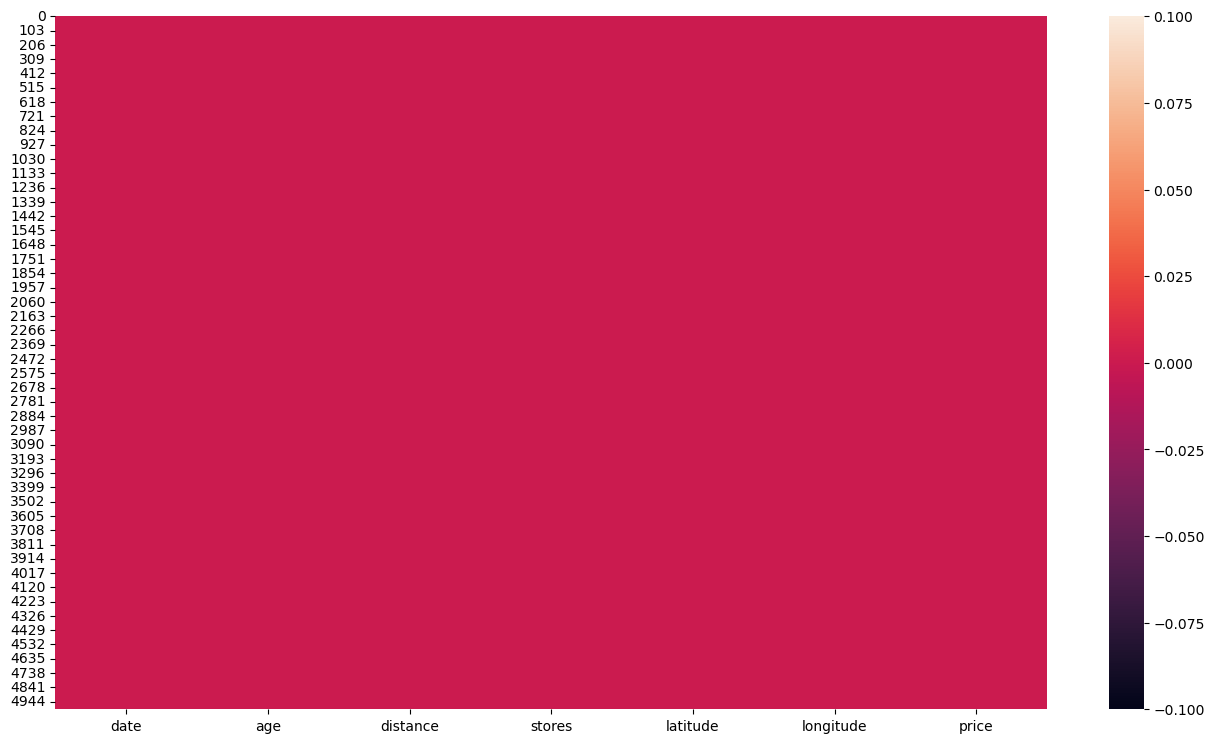

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

# Checking the Missing Values

In [10]:
df.isna()

,date,age,distance,stores,latitude,longitude,price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [11]:
df.isna().sum()

date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

# Data Normalization

In [12]:
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,age,distance,stores,latitude,longitude,price
0,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


# Selecting the X-Labels

In [13]:
X = df_norm.iloc[:, :5]
X.head()

,age,distance,stores,latitude,longitude
0,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.534444,0.006938,0.981581,-1.255981,-0.945141


# Selecting the Y-Labels

In [14]:
Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

# Feature and Label Values

In [15]:
X_arr = X.values
Y_arr = Y.values

In [16]:
X_arr

array([[ 0.18138426,  1.25700164,  0.34522379, -0.30721158, -1.26079862],
       [-1.31911814, -0.93060999, -0.60931203,  0.32530146, -1.26079862],
       [-0.08341028, -0.61809404,  0.66340239,  1.59032754, -1.57645598],
       ...,
       [-1.14258845,  1.56951759,  0.02704518,  1.59032754,  0.00183081],
       [ 1.59362182, -0.61809404,  0.02704518, -1.25598114,  0.94880289],
       [-0.87779391, -1.24312594,  1.2997596 ,  1.59032754,  0.63314553]])

In [17]:
Y_arr

array([ 0.35008836, -1.83648583, -0.33958379, ...,  0.19138539,
        0.39809111, -1.11350566])

# Testing and Training Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.01, shuffle = True, random_state=1)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4950, 5)
y_train shape:  (4950,)
X_test shape:  (50, 5)
y_test shape:  (50,)


# Creating the Model

In [19]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (5,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

In [20]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [21]:
model = get_model()
preds_on_untrained = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [22]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1000
)

Epoch 1/1000
155/155 [==============================] - 1s 3ms/step - loss: 1.0430 - val_loss: 0.8107
Epoch 2/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.0405 - val_loss: 0.8075
Epoch 3/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.0380 - val_loss: 0.8045
Epoch 4/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.0357 - val_loss: 0.8015
Epoch 5/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.0334 - val_loss: 0.7985
Epoch 6/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.0311 - val_loss: 0.7956
Epoch 7/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.0289 - val_loss: 0.7928
Epoch 8/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.0268 - val_loss: 0.7901
Epoch 9/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.0246 - val_loss: 0.7873
Epoch 10/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.022

155/155 [==============================] - 0s 1ms/step - loss: 0.9172 - val_loss: 0.6557
Epoch 81/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.9161 - val_loss: 0.6547
Epoch 82/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.9150 - val_loss: 0.6536
Epoch 83/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.9139 - val_loss: 0.6525
Epoch 84/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.9128 - val_loss: 0.6514
Epoch 85/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.9117 - val_loss: 0.6503
Epoch 86/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.9106 - val_loss: 0.6492
Epoch 87/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.9095 - val_loss: 0.6482
Epoch 88/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.9084 - val_loss: 0.6471
Epoch 89/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.9073 - v

155/155 [==============================] - 0s 2ms/step - loss: 0.8394 - val_loss: 0.5851
Epoch 160/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.8385 - val_loss: 0.5844
Epoch 161/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.8376 - val_loss: 0.5836
Epoch 162/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.8367 - val_loss: 0.5828
Epoch 163/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.8358 - val_loss: 0.5821
Epoch 164/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.8349 - val_loss: 0.5813
Epoch 165/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.8340 - val_loss: 0.5806
Epoch 166/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.8332 - val_loss: 0.5799
Epoch 167/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.8323 - val_loss: 0.5791
Epoch 168/1000
155/155 [==============================] - 0s 2ms/step - loss: 0

Epoch 238/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7730 - val_loss: 0.5352
Epoch 239/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7722 - val_loss: 0.5345
Epoch 240/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7713 - val_loss: 0.5338
Epoch 241/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7705 - val_loss: 0.5332
Epoch 242/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7697 - val_loss: 0.5325
Epoch 243/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7688 - val_loss: 0.5319
Epoch 244/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7680 - val_loss: 0.5312
Epoch 245/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7672 - val_loss: 0.5306
Epoch 246/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.7663 - val_loss: 0.5299
Epoch 247/1000
155/155 [==============================] - 0s 1ms

Epoch 317/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7069 - val_loss: 0.4851
Epoch 318/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7061 - val_loss: 0.4845
Epoch 319/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7052 - val_loss: 0.4838
Epoch 320/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7043 - val_loss: 0.4832
Epoch 321/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7035 - val_loss: 0.4825
Epoch 322/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7026 - val_loss: 0.4819
Epoch 323/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7018 - val_loss: 0.4813
Epoch 324/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7009 - val_loss: 0.4806
Epoch 325/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7001 - val_loss: 0.4800
Epoch 326/1000
155/155 [==============================] - 0s 2ms

Epoch 396/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.6369 - val_loss: 0.4326
Epoch 397/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.6360 - val_loss: 0.4319
Epoch 398/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.6351 - val_loss: 0.4312
Epoch 399/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.6342 - val_loss: 0.4305
Epoch 400/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.6333 - val_loss: 0.4298
Epoch 401/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.6324 - val_loss: 0.4291
Epoch 402/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.6315 - val_loss: 0.4284
Epoch 403/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.6306 - val_loss: 0.4277
Epoch 404/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.6297 - val_loss: 0.4270
Epoch 405/1000
155/155 [==============================] - 0s 2ms

Epoch 475/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.5651 - val_loss: 0.3790
Epoch 476/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.5642 - val_loss: 0.3783
Epoch 477/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.5633 - val_loss: 0.3776
Epoch 478/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.5624 - val_loss: 0.3769
Epoch 479/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.5615 - val_loss: 0.3763
Epoch 480/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.5606 - val_loss: 0.3756
Epoch 481/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.5597 - val_loss: 0.3749
Epoch 482/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.5588 - val_loss: 0.3742
Epoch 483/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.5580 - val_loss: 0.3735
Epoch 484/1000
155/155 [==============================] - 0s 2ms

Epoch 554/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4954 - val_loss: 0.3255
Epoch 555/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4945 - val_loss: 0.3249
Epoch 556/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4937 - val_loss: 0.3243
Epoch 557/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4928 - val_loss: 0.3237
Epoch 558/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4920 - val_loss: 0.3230
Epoch 559/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4911 - val_loss: 0.3224
Epoch 560/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4903 - val_loss: 0.3218
Epoch 561/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4894 - val_loss: 0.3211
Epoch 562/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4886 - val_loss: 0.3205
Epoch 563/1000
155/155 [==============================] - 0s 2ms

Epoch 633/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4316 - val_loss: 0.2783
Epoch 634/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4309 - val_loss: 0.2777
Epoch 635/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4301 - val_loss: 0.2772
Epoch 636/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4294 - val_loss: 0.2766
Epoch 637/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4286 - val_loss: 0.2760
Epoch 638/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4279 - val_loss: 0.2754
Epoch 639/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4271 - val_loss: 0.2749
Epoch 640/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4264 - val_loss: 0.2743
Epoch 641/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.4256 - val_loss: 0.2737
Epoch 642/1000
155/155 [==============================] - 0s 2ms

Epoch 712/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3763 - val_loss: 0.2335
Epoch 713/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3757 - val_loss: 0.2330
Epoch 714/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3750 - val_loss: 0.2324
Epoch 715/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3744 - val_loss: 0.2319
Epoch 716/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3738 - val_loss: 0.2313
Epoch 717/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3731 - val_loss: 0.2308
Epoch 718/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3725 - val_loss: 0.2303
Epoch 719/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3718 - val_loss: 0.2298
Epoch 720/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3712 - val_loss: 0.2292
Epoch 721/1000
155/155 [==============================] - 0s 2ms

Epoch 791/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3308 - val_loss: 0.1967
Epoch 792/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3303 - val_loss: 0.1963
Epoch 793/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3297 - val_loss: 0.1959
Epoch 794/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3292 - val_loss: 0.1955
Epoch 795/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3287 - val_loss: 0.1951
Epoch 796/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3282 - val_loss: 0.1948
Epoch 797/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3277 - val_loss: 0.1944
Epoch 798/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3272 - val_loss: 0.1940
Epoch 799/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.3267 - val_loss: 0.1936
Epoch 800/1000
155/155 [==============================] - 0s 2ms

Epoch 870/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2947 - val_loss: 0.1699
Epoch 871/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2943 - val_loss: 0.1696
Epoch 872/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2939 - val_loss: 0.1693
Epoch 873/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2935 - val_loss: 0.1690
Epoch 874/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2932 - val_loss: 0.1687
Epoch 875/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2928 - val_loss: 0.1685
Epoch 876/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2924 - val_loss: 0.1682
Epoch 877/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2920 - val_loss: 0.1679
Epoch 878/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2916 - val_loss: 0.1676
Epoch 879/1000
155/155 [==============================] - 0s 2ms

Epoch 949/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2676 - val_loss: 0.1508
Epoch 950/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2673 - val_loss: 0.1506
Epoch 951/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2670 - val_loss: 0.1504
Epoch 952/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2667 - val_loss: 0.1502
Epoch 953/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2665 - val_loss: 0.1500
Epoch 954/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2662 - val_loss: 0.1498
Epoch 955/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2659 - val_loss: 0.1496
Epoch 956/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2656 - val_loss: 0.1495
Epoch 957/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2653 - val_loss: 0.1493
Epoch 958/1000
155/155 [==============================] - 0s 2ms

# Plotting the Graphs 

<Axes: >

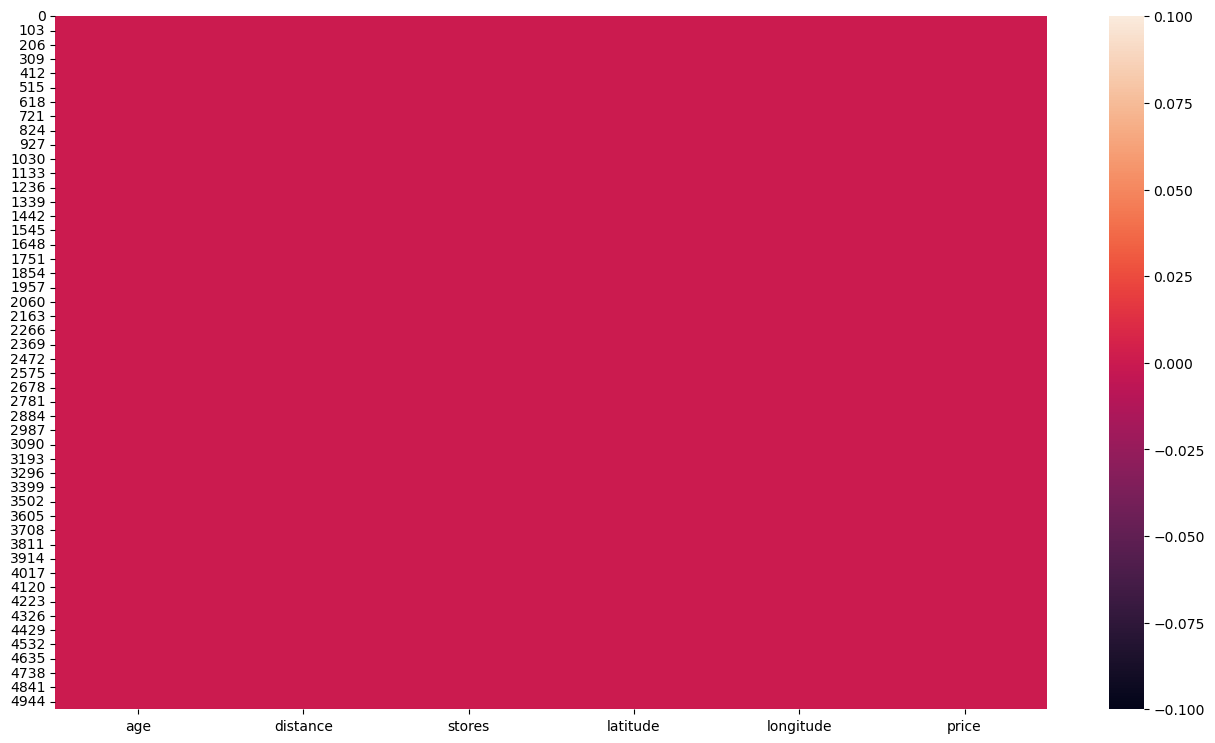

In [23]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())